<a href="https://colab.research.google.com/github/pkchen1129/Computer-Vision/blob/master/Copy_of_EECS_504_PS1_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EECS 504 PS1: Filtering

Please provide the following information 
(e.g. Andrew Owens, ahowens):

[PoKang] [Chen], [pkchen]




# Introduction

We'll provide you with starter code, like this, in a Jupyter notebook for most problem sets. Please fill in the code to complete the assignment, and submit your notebook to Canvas as a .ipynb file. You can, of course, initially write your code offline in an editor like Emacs or Vim -- we'd just like the final output to be in a notebook format to make grading more consistent. You can also host your notebook locally.

Please note that *we won't run your code*. The notebook you submit should already contain all of the results we ask for. In particular, the visualizations of edge responses and blurred images should be computed *before you submit*.  Also, please do not include long, unnecessary outputs (a few print statements and visualizations are fine, but pages of debugging messages make grading difficult).

If you'd like to preview what your notebook will look like when we grade it, follow the directions [here](https://stackoverflow.com/questions/15998491/how-to-convert-ipython-notebooks-to-pdf-and-html) for converting the .ipynb notebook into an HTML file. We'll be running a command similar to: 
```
ipython nbconvert --to html ps1.ipynb  
```




# First steps

Run the following code to import the modules that you'll need, and to download the images. You are welcome to modify this code (e.g. by importing more modules).

In [0]:
import numpy as np, matplotlib as mpl, matplotlib.pyplot as plt, urllib, os
import scipy.ndimage # For image filtering
import imageio # For loading images
import cv2

# Download the images that you'll need
base_url = 'https://web.eecs.umich.edu/~ahowens/eecs504/w20/psets/ps1/ims'
for name in ['dog-1.jpg', 'dog-2.jpg', 'apple.jpg']:
  with open(name, 'wb') as out:
    url = os.path.join(base_url, name)
    out.write(urllib.request.urlopen(url).read())



# Problem 1.2: Pet edge detection (a)

The shape of the image is: (265, 400)


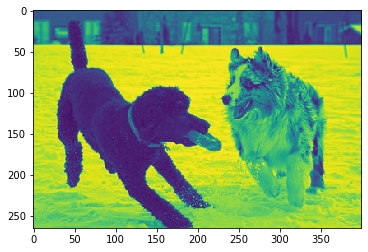

dx =  [[ 1 -1]]
dy =  [[ 1]
 [-1]]


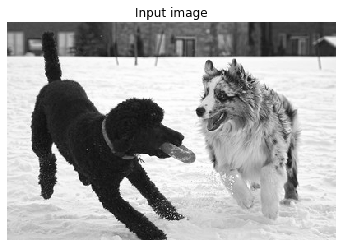

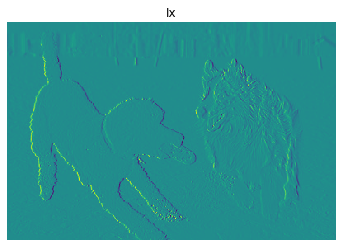

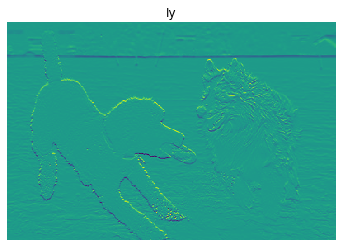

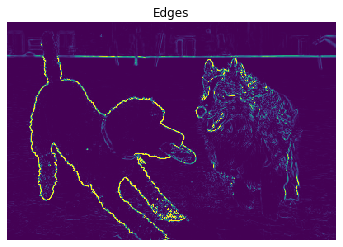

In [0]:
from matplotlib import pyplot as plt
import cv2
# You can upload images yourself or load them from URLs
im = imageio.imread('dog-1.jpg')
# Convert to grayscale. We'll use floats in [0, 1].
im = im.mean(2)/255.
#Find out the size of image
print('The shape of the image is:', im.shape)
plt.imshow(im)
plt.show()

# def convolve(im, h):
#   edges = cv2.filter2D(img,cv2.CV_8U,h)
#   return edges

# sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=1)





#Based on: https://stackoverflow.com/questions/2448015/2d-convolution-using-python-and-numpy
def convolve(im, h):

    m = h.shape
    # print("m = ",m)
    # print("h = ",h)

    if (m[0] == 1 ):
        h = list(h.flat) #https://stackoverflow.com/questions/13730468/from-nd-to-1d-arrays
        y, x = im.shape
        y = y - m[1] + 1
        x = x - m[1] + 1
        new_im = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_im[i][j] = np.sum(im[i, j:j+m[1]]*h)
                # new_im[i][j] = np.sum(im[i, j]*h[0] + im[i+m[1],j]*h[1] )

        return new_im
    else:
        y, x = im.shape
        y = y - m[0] + 1
        x = x - m[0] + 1
        new_im = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_im[i][j] = np.sum(im[i:i+m[0], j]*h)
        return new_im
    



dx = np.matrix([1,-1])
np.flip(dx,0)
np.flip(dx,1)

dy = np.matrix([1,-1]).T
np.flip(dy,0)
np.flip(dy,1)

print("dx = ",dx)
print("dy = ",dy)

# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Input image')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.axis('off')
plt.title('Ix')
plt.imshow(Ix)

plt.figure()
plt.title('Iy')
plt.axis('off')
plt.imshow(Iy)

plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


# Problem 1.2: Pet edge detection (c)

Please visualize the images and edges with matplotlib, using code similar to what we provided in (a).

Before Gaussian Blur


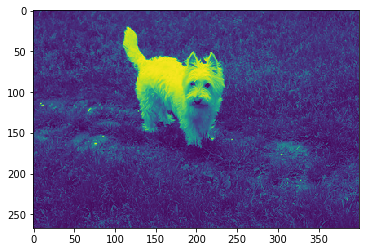

Gaussian blurred


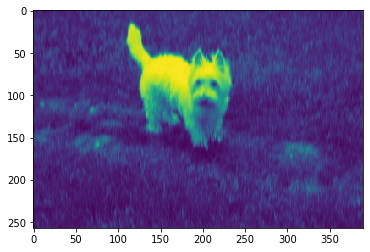

Box filtered


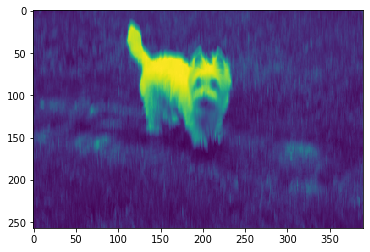

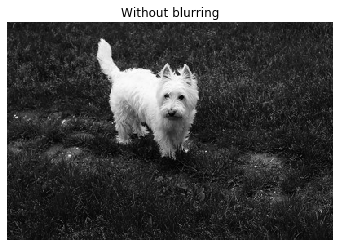

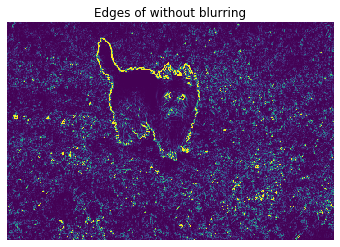

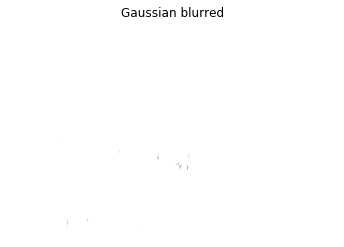

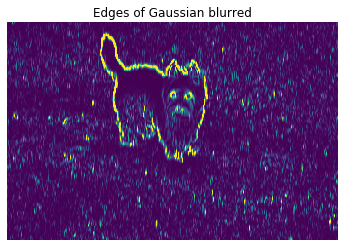

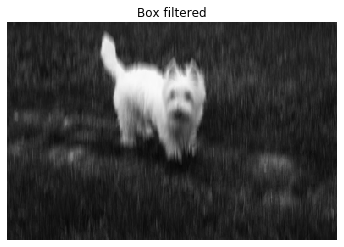

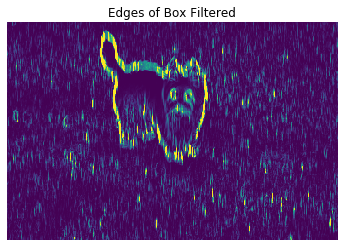

In [0]:
from scipy import ndimage

im = imageio.imread('dog-2.jpg').mean(2)/255.
print("Before Gaussian Blur")
plt.imshow(im)
plt.show()

#Creating Gaussian Blur
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
def gaussian_kernel(size, sigma=2, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D
kernel = gaussian_kernel(11, sigma=2, verbose=False)

#Creating boxes
box = np.full((11, 11), 1/11/11)

##Convolving
gaussian_out = convolve(im, kernel)
box_out = convolve(im, box)

print("Gaussian blurred")
plt.imshow(gaussian_out)
plt.show()
print("Box filtered")
plt.imshow(box_out)
plt.show()
# Your code here!






###Print for without blurring
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(im, dx)
Iy = convolve(im, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Without blurring')
plt.axis('off')
plt.imshow(im, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges of without blurring')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

###Print for Gaussian blurring
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(gaussian_out, dx)
Iy = convolve(gaussian_out, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Gaussian blurred')
plt.axis('off')
plt.imshow(gaussian_out, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges of Gaussian blurred')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

###Print for box filter
# Convolve the image with horizontal and vertical gradient filters
Ix = convolve(box_out, dx)
Iy = convolve(box_out, dy)
edges = Ix**2. + Iy**2.

# Visualize edge maps using matplotlib
plt.figure()
plt.title('Box filtered')
plt.axis('off')
plt.imshow(box_out, cmap = 'gray', vmin = 0, vmax = 1)

plt.figure()
plt.title('Edges of Box Filtered')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))

# Problem 1.2: Pet edge detection (d)

Please use the visualization code to display the filter you construct.

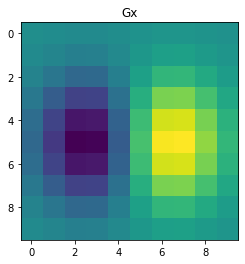

In [0]:
# Your code here!
###Reference for Gaussian: http://www.adeveloperdiary.com/data-science/computer-vision/applying-gaussian-smoothing-to-an-image-using-python-from-scratch/
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)
def gaussian_kernel(size, sigma=2, verbose=False):
 
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)
 
    kernel_2D *= 1.0 / kernel_2D.max()
 
    if verbose:
        plt.imshow(kernel_2D, interpolation='none',cmap='gray')
        plt.title("Image")
        plt.show()
 
    return kernel_2D
kernel = gaussian_kernel(11, sigma=2, verbose=False)


Gx = convolve(kernel, dx)
plt.figure()
plt.title('Gx')
plt.imshow(Gx)

# Problem 1.2 Pet edge detection (e)
Please visualize the results using matplotlib.

[[ 0.02436126  0.01081402 -0.00831848 ... -0.01830065 -0.03683898
  -0.03267974]
 [ 0.02602496  0.01259655 -0.00760547 ... -0.01568627 -0.03648247
  -0.03565062]
 [ 0.02150921  0.01224005 -0.0073678  ... -0.01010101 -0.03541295
  -0.03778966]
 ...
 [ 0.00606061  0.00653595 -0.01473559 ...  0.00641711 -0.02234106
  -0.00178253]
 [ 0.00106952  0.01437908 -0.03172906 ...  0.00297089 -0.02269756
  -0.00142602]
 [ 0.00142602  0.01687463 -0.04040404 ...  0.00118835 -0.02293523
  -0.00225787]]
[[-0.00261438 -0.00095068  0.00083185 ...  0.00439691  0.00701129
   0.0073678 ]
 [ 0.00071301 -0.00380273 -0.00415924 ...  0.00273321  0.00831848
   0.009388  ]
 [ 0.00392157 -0.00427807 -0.00665478 ...  0.00047534  0.01687463
   0.02352941]
 ...
 [-0.00047534 -0.00546643  0.00237671 ...  0.00487225  0.00142602
   0.00106952]
 [ 0.00225787  0.00261438  0.00510992 ...  0.00582294  0.0040404
   0.00380273]
 [-0.00582294  0.00035651  0.00083185 ...  0.00392157  0.00190137
   0.0016637 ]]
[0.78539816339744

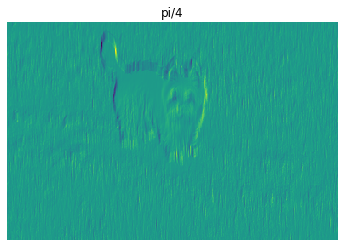

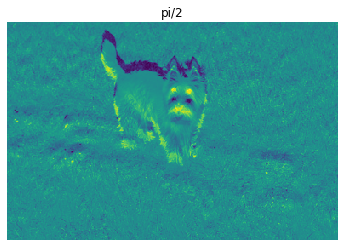

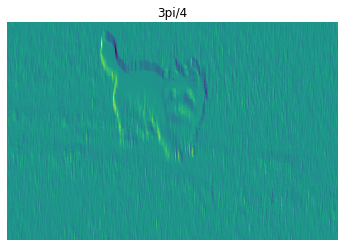

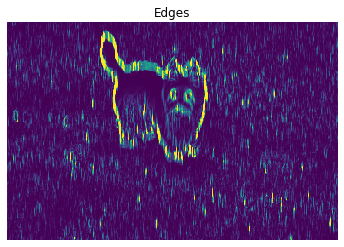

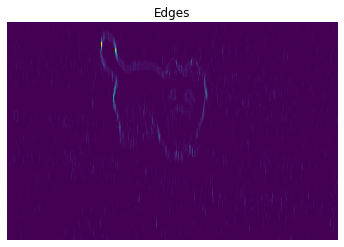

In [0]:
import math as m
im = imageio.imread('apple.jpg').mean(2)/255.
theta = [ 1/4*math.pi, 1/2*math.pi, 3/4*math.pi]
def oriented_grad(Ix,Iy,theta):
  print(Ix)
  print(Iy)
  print(theta)
  
  a = Ix*m.cos(theta[0]) + Iy*m.sin(theta[0])
  b = Ix*m.cos(theta[1]) + Iy*m.sin(theta[1])
  c = Ix*m.cos(theta[2]) + Iy*m.sin(theta[2])



  plt.figure()
  plt.axis('off')
  plt.title('pi/4')
  plt.imshow(a)

  plt.figure()
  plt.title('pi/2')
  plt.axis('off')
  plt.imshow(b)

  plt.figure()
  plt.title('3pi/4')
  plt.axis('off')
  plt.imshow(c)


  edges = a**2+ b**2 + c**2


  return edges


a = oriented_grad(Ix,Iy,theta)



  
plt.figure()
plt.title('Edges')
plt.axis('off')
# Please visualize edge responses using this range of values.
plt.imshow(edges, vmin = 0., vmax = np.percentile(edges, 99))


plt.figure()
plt.title('Edges')
plt.axis('off')

plt.imshow(edges)
# Your code here!